In [63]:
%matplotlib inline
from matplotlib import pyplot as plt
import json
import os
from collections import defaultdict
import numpy as np

In [51]:
data = json.load(open("experiment_1.json"))

In [52]:
baseline = data[0]['recommenders']['GreedyMLPHistoricalEmbedding']['model_metadata']['val_ndcg_history']
model = data[0]['recommenders']['GreedyMLPHistoricalEmbeddingLR']['model_metadata']['val_ndcg_history']

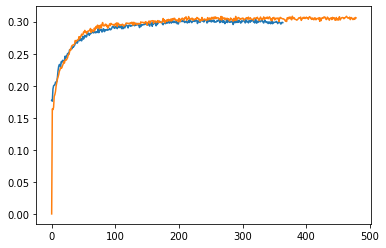

In [53]:
plt.plot(baseline)
plt.plot(model)

In [71]:
results = defaultdict(list)
for filename in os.listdir('.'):
    if filename.endswith('.json'):
        try:
            recommenders = json.load(open(filename))[0]['recommenders']
            for key in recommenders:
                results[key].append((recommenders[key]['sps@10']))
        except:
            pass

In [72]:
x = []
y = []
for recommender in results:
    x.append(results[recommender])
    y.append(recommender)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe574610f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe5746100d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe574684e80>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe574610ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe574622190>],
 'means': []}

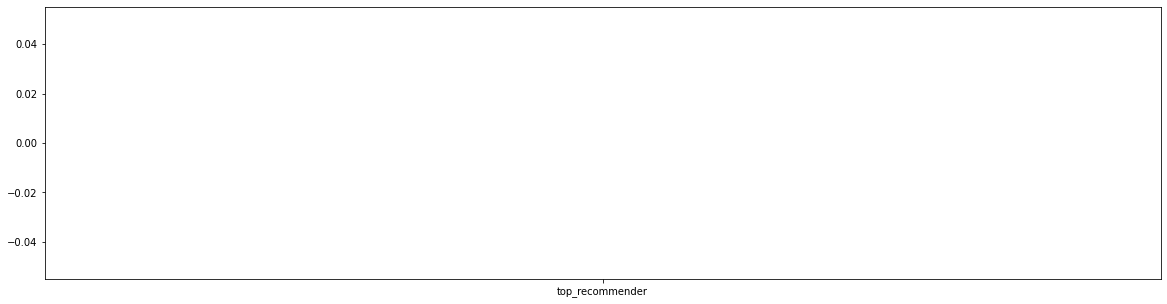

In [73]:
plt.figure(figsize=(20, 5))
plt.boxplot(x, labels=y)

In [70]:
np.mean(results['GreedyMLPHistoricalEmbeddingLR'])

0.5317808549974498